## TASK-1

When customers come in financial difficulties, it usually does not happen at once. There are indicators which can be used to anticipate the final outcome, such as late payments, calls to the customer services, enquiries about the products, a different browsing pattern on the web or mobile app. By using such patterns it is possible to prevent, or at least guide the process and provide a better service for the customer as well as reduced risks for the bank.

The dataset has two files:

1. `applicant.csv`: This file contains personal data about the (primary) applicant
- Unique ID: `applicant_id` (string)
- Other fields:
    - Primary_applicant_age_in_years (numeric)
    - Gender (string)
    - Marital_status (string)
    - Number_of_dependents (numeric)
    - Housing (string)
    - Years_at_current_residence (numeric)
    - Employment_status (string)
    - Has_been_employed_for_at_least (string)
    - Has_been_employed_for_at_most (string)
    - Telephone (string)
    - Foreign_worker (numeric)
    - Savings_account_balance (string)
    - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
    - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)

2. `loan.csv`: This file contains data more specific to the loan application
- Target: `high_risk_application` (numeric)
- Other fields:
    - applicant_id (string)
    - Months_loan_taken_for (numeric)
    - Purpose (string)
    - Principal_loan_amount (numeric)
    - EMI_rate_in_percentage_of_disposable_income (numeric)
    - Property (string)
    - Has_coapplicant (numeric)
    - Has_guarantor (numeric)
    - Other_EMI_plans (string)
    - Number_of_existing_loans_at_this_bank (numeric)
    - Loan_history (string)

1. Do the Exploratory Data Analysis & share the insights.
2. How would you segment customers based on their risk (of default).
3. Which of these segments / sub-segments would you propose be approved?
    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?
4. Tell us what your observations were on the data itself (completeness, skews).

Colab link; https://colab.research.google.com/drive/1kzedbSG2fpTSgi2HJMGQWEIphUKpPgkj?usp=sharing


In [ ]:
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 


In [5]:
# importing sql libraries
# import pymysql
# import pymysql.cursors
# from mysql.connector import Error
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Numerical libraries
import numpy as np   
# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Other's
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

In [ ]:
# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='arnab@123',
                             database='creditdefaulter')

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [ ]:
connection

In [ ]:
# Import data from MYSQL server
df_1 = pd.read_sql('Select * from creditdefaulter.`applicant`', con=connection)
df_2 = pd.read_sql('Select * from creditdefaulter.`loan`', con=connection)

In [ ]:
# exploring shape & size of the dataframes
print(df_1.shape,df_1.size)
print(df_2.shape,df_2.size)

NameError: ignored

In [ ]:
df_Original = pd.concat([df_1, df_2], axis=1, sort=False) 
df = df_Original.copy(deep=True) # Backup the original data

In [7]:
# Alternatively
df_1 = pd.read_csv('loan.csv')
df_2=pd.read_csv('applicant.csv')
df_Original = pd.concat([df_1, df_2], axis=1, sort=False) 
df = df_Original.copy(deep=True) # Backup the original data

In [8]:
df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [9]:
df.shape

(1000, 28)

In [10]:
## checking if there are any duplicated entries
len(df[df.duplicated()])

0

In [11]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

### Let's Analyze continuous features

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,1514763.121,2.286764e+05,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.00,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.00,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.00,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.00,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.00,1.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.00,4.0
high_risk_applicant,1000.0,0.300,4.584869e-01,0.0,0.0,0.0,1.00,1.0
applicant_id,1000.0,1514763.121,2.286764e+05,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Primary_applicant_age_in_years,1000.0,35.546,1.137547e+01,19.0,27.0,33.0,42.00,75.0


- According to the statistical summary given above, there are 13 numerical columns and 15 categorical columns.
- There are 28 features with 1000 different data entries.
#### Analysing statistically from above
- People taking loans for avg 20 months. 75% people take loans for 24 months or less. Max months- 72 shows there are outliers but still significant for analysis
- Mean loan amount is  Rs 32,71,258 with Maximum being Rs 1,84,24,000.
- EMIs range from 1-4% with most banks offering about 3% interest rate
- Most people dont have any Coapplicant as the mean fr Coappliacant is very low.
- The guaranters can be a factor that tell about loan repayment directly but the mean is very low for this feature too
- High risk applicants mean showing 0.3 shows an imbalance in dataset for taregt column.
- Number_of_existing_loans_at_bank also can directly influence loan repaymment(more the ongoing loans lesser would be the Loan default risk. We will need to check that from data how true this is)
- Age_in_years ranges from 19 to 75.
- Number of dependents in family ranges in (1,2)
- Years_at_current_residence have a mean value of 2.845	
- We can drop Applicant ID as it is an unique identifier
- In columns 'Has_coapplicant', 'Has_guarantor','Number_of_existing_loans_at_this_bank','Number_of_dependents' the mean is greater than the median. It indicates the distribution is skewed.

In [13]:
df.describe(include='object').transpose()

,count,unique,top,freq
loan_application_id,1000,1000,d68d975e-edad-11ea-8761-1d6f9c1ff461,1
Purpose,988,9,electronic equipment,280
Property,846,3,car or other,332
Other_EMI_plans,186,2,bank,139
Loan_history,1000,5,existing loans paid back duly till now,530
Gender,1000,2,male,690
Marital_status,1000,4,single,548
Housing,1000,3,own,713
Employment_status,1000,4,skilled employee / official,630
Has_been_employed_for_at_least,938,4,1 year,339


All The object features are categorical variables since they have unique datapoints
- Everything under object type is categorical with fixed set of choices the customer might have been given.
- There are null values in some columns which needs to be treated.
- Agian , here Telephone , loan_application_id look redundant and can be droppped

## Note- The 'applicant_id' feature although irrelevant for building the model as it is an identification tag for each customer tells about the range of data that is being provided to us, if anything abnormal can be raised with client. Here IDs range randomly from 10000 to 20000 so all good.


###Handling Null Values

In [14]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

Other_EMI_plans                                             81.4
Balance_in_existing_bank_account_(lower_limit_of_bucket)    66.8
Telephone                                                   59.6
Balance_in_existing_bank_account_(upper_limit_of_bucket)    45.7
Has_been_employed_for_at_most                               25.3
Savings_account_balance                                     18.3
Property                                                    15.4
Has_been_employed_for_at_least                               6.2
Purpose                                                      1.2
Marital_status                                               0.0
Foreign_worker                                               0.0
Employment_status                                            0.0
Years_at_current_residence                                   0.0
Housing                                                      0.0
Number_of_dependents                                         0.0
loan_application_id      

In [17]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df))]
null_col

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

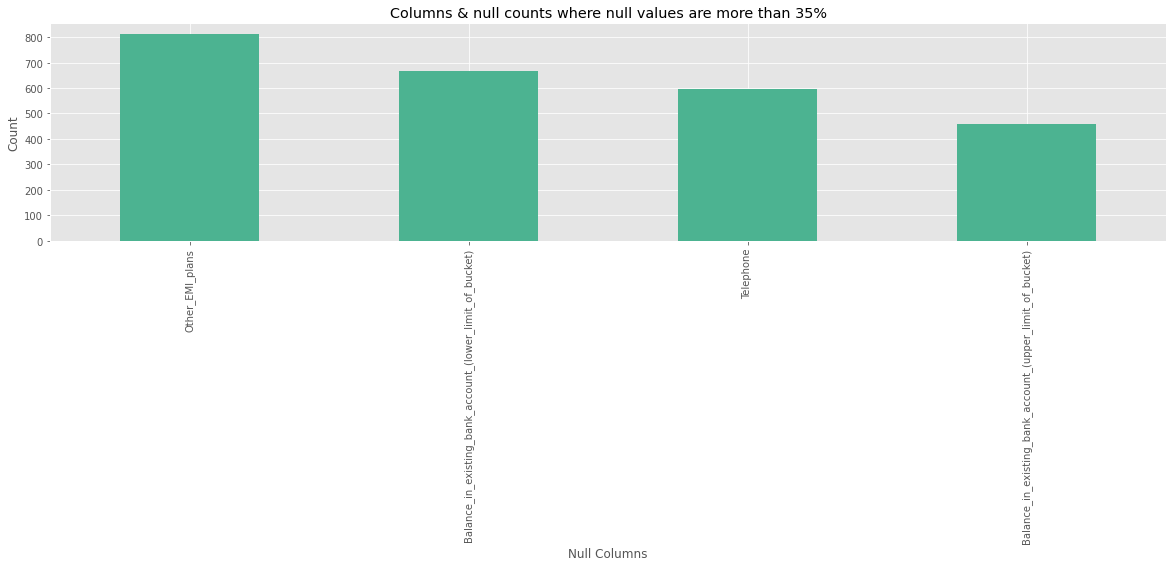

In [18]:
#Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('Columns & null counts where null values are more than 35%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})      
plt.ylabel("Count",fontdict={"fontsize":12,"fontweight":5})
plt.show()

25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. But practically we get variables with ~50% of missing values but still, the customer insists to have it for analyzing. In those cases, we have to treat them accordingly. Here, I will remove columns with null values more than 35% after observing it

In [19]:
df.drop(['Other_EMI_plans','Telephone','Balance_in_existing_bank_account_(upper_limit_of_bucket)','Balance_in_existing_bank_account_(lower_limit_of_bucket)'],axis=1,inplace = True) #Droping those columns
df.shape

(1000, 24)

### Drop the columns redundant for the analysis.


In [20]:
df = df.drop(['applicant_id','loan_application_id'], axis=1)
df.columns

Index(['Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Foreign_worker', 'Savings_account_balance'],
      dtype='object')

## After removing null values, check the percentage of null values for each column again.

In [22]:
null = (df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)
null.head(30)

Has_been_employed_for_at_most                  25.3
Savings_account_balance                        18.3
Property                                       15.4
Has_been_employed_for_at_least                  6.2
Purpose                                         1.2
Marital_status                                  0.0
Foreign_worker                                  0.0
Employment_status                               0.0
Years_at_current_residence                      0.0
Housing                                         0.0
Number_of_dependents                            0.0
Months_loan_taken_for                           0.0
Gender                                          0.0
high_risk_applicant                             0.0
Loan_history                                    0.0
Number_of_existing_loans_at_this_bank           0.0
Has_guarantor                                   0.0
Has_coapplicant                                 0.0
EMI_rate_in_percentage_of_disposable_income     0.0
Principal_lo

## We got 5 cols that stil got missing values- Object datatypes

In [23]:
df["Has_been_employed_for_at_least"] =df["Has_been_employed_for_at_least"].str.extract("(\d+)")
df["Has_been_employed_for_at_most"] =df["Has_been_employed_for_at_most"].str.extract("(\d+)")
df.head()

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0,67,male,single,1,own,4,skilled employee / official,7,NaN,1,NaN
1,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1,4,1,Low
2,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0,49,male,single,2,own,3,unskilled - resident,4,7,1,Low
3,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0,45,male,single,2,for free,4,skilled employee / official,4,7,1,Low
4,24,new vehicle,4870000,3,NaN,0,0,2,delay in paying off loans in the past,1,53,male,single,2,for free,4,skilled employee / official,1,4,1,Low


In [24]:
# convert them to Numeric type
df["Has_been_employed_for_at_least"] =pd.to_numeric(df["Has_been_employed_for_at_least"])
df["Has_been_employed_for_at_most"] =pd.to_numeric(df["Has_been_employed_for_at_most"])

In [25]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Months_loan_taken_for                        1000 non-null   int64  
 1   Purpose                                      988 non-null    object 
 2   Principal_loan_amount                        1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 4   Property                                     846 non-null    object 
 5   Has_coapplicant                              1000 non-null   int64  
 6   Has_guarantor                                1000 non-null   int64  
 7   Number_of_existing_loans_at_this_bank        1000 non-null   int64  
 8   Loan_history                                 1000 non-null   object 
 9   high_risk_applicant                          1000 non-null   int64  
 10  P

In [26]:
df.value_counts('Has_been_employed_for_at_least')

Has_been_employed_for_at_least
1.0    339
7.0    253
4.0    174
0.0    172
dtype: int64

In [27]:
df.value_counts('Has_been_employed_for_at_most')

Has_been_employed_for_at_most
4.0    339
7.0    174
1.0    172
0.0     62
dtype: int64

## Replacing null palces with mode values

In [28]:
df.Has_been_employed_for_at_least.fillna( df.Has_been_employed_for_at_least.mode()[0],inplace = True)

In [29]:
df.Has_been_employed_for_at_most.fillna( df.Has_been_employed_for_at_most.mode()[0],inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Months_loan_taken_for                        1000 non-null   int64  
 1   Purpose                                      988 non-null    object 
 2   Principal_loan_amount                        1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 4   Property                                     846 non-null    object 
 5   Has_coapplicant                              1000 non-null   int64  
 6   Has_guarantor                                1000 non-null   int64  
 7   Number_of_existing_loans_at_this_bank        1000 non-null   int64  
 8   Loan_history                                 1000 non-null   object 
 9   high_risk_applicant                          1000 non-null   int64  
 10  P

In [31]:
df.value_counts('Purpose')

Purpose
electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
dtype: int64

Not many Null values- replace Purpose null values with mode 'electronic equipment' 



In [32]:
df.Purpose.fillna( df.Purpose.mode()[0],inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Months_loan_taken_for                        1000 non-null   int64  
 1   Purpose                                      1000 non-null   object 
 2   Principal_loan_amount                        1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 4   Property                                     846 non-null    object 
 5   Has_coapplicant                              1000 non-null   int64  
 6   Has_guarantor                                1000 non-null   int64  
 7   Number_of_existing_loans_at_this_bank        1000 non-null   int64  
 8   Loan_history                                 1000 non-null   object 
 9   high_risk_applicant                          1000 non-null   int64  
 10  P

In [34]:
df.value_counts('Savings_account_balance')

Savings_account_balance
Low          603
Medium       103
High          63
Very high     48
dtype: int64

## Replace Savings_account_balance null values with mode low

In [35]:
df.Savings_account_balance.fillna( df.Savings_account_balance.mode()[0],inplace = True)

## Since its nominal data replacing it with numbers

In [36]:
df.Savings_account_balance[df.Savings_account_balance=='Low']=0
df.Savings_account_balance[df.Savings_account_balance=='Medium']=0.25
df.Savings_account_balance[df.Savings_account_balance=='High']=0.5
df.Savings_account_balance[df.Savings_account_balance=='Very high']=1
df.value_counts('Savings_account_balance')

Savings_account_balance
0.00    786
0.25    103
0.50     63
1.00     48
dtype: int64

## Similarly

In [37]:
df.value_counts('Property')

Property
car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
dtype: int64

In [38]:
df.Property.fillna( df.Property.mode()[0],inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Months_loan_taken_for                        1000 non-null   int64  
 1   Purpose                                      1000 non-null   object 
 2   Principal_loan_amount                        1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 4   Property                                     1000 non-null   object 
 5   Has_coapplicant                              1000 non-null   int64  
 6   Has_guarantor                                1000 non-null   int64  
 7   Number_of_existing_loans_at_this_bank        1000 non-null   int64  
 8   Loan_history                                 1000 non-null   object 
 9   high_risk_applicant                          1000 non-null   int64  
 10  P

## No null values left

#### Dropping continuous columns if correlation surpasses 0.95|:

In [40]:
cor_matrix = df.corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


#### No such column found
#### Dropping catagorial columns: The independent variable is categorical and thus analyzing the distribution is not important here. However, a chi-squared test will be conducted to determine whether this feature should be removed or not.



In [41]:
# column_name_unique = {}
# for column_name in df.columns:
#     if(str(df[column_name].dtypes) != 'object' and len(df[column_name].unique())<10 and column_name != 'high_risk_applicant	'):
#             column_name_unique[column_name] = df[column_name].unique()
#             df[column_name] = df[column_name].astype('O')
        
# column_name_unique

In [42]:
# from scipy.stats import chi2_contingency
# def BackwardFilteringApproach(df):
#     global drop_col_names,col_name
#     catagorial = list(df.select_dtypes(include=[np.object]))
#     for columnName in catagorial:
#         data= pd.crosstab(df[columnName], df['high_risk_applicant'])
#         p= chi2_contingency(data)[1]
#         threshold = 0.05
#         p_values_col[columnName]=p
#         if p > threshold:
#             df = df.drop(columns = columnName)
#             drop_col_names.append(columnName)
#         else:
#             col_name.append(columnName)
            

#     print("\nThe p-value for each non_catagorial column: \n", p_values_col)
#     print("\nThe relationship confirms the alternative hypothesis: it is statistically significant")
#     print("\nThe column is kept because p-value indicates presence of a statistically significant relationship between column and target column.", col_name)
#     print("\nThe columns should be removed as p-value indicates that the relationship between column and target is not statistically significant.",drop_col_names)
#     return df
    
# drop_col_names = []
# col_name = []
# p_values_col = {}
# df = BackwardFilteringApproach(df)

### Again no such column found that could be redundant

### Rearranging target column to bring it at start


In [43]:
firstcol=df.pop('high_risk_applicant')
df.insert(0,'high_risk_applicant',firstcol )
df

,high_risk_applicant,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
0,0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,67,male,single,1,own,4,skilled employee / official,7.0,4.0,1,0
1,1,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,22,female,divorced/separated/married,1,own,2,skilled employee / official,1.0,4.0,1,0
2,0,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,49,male,single,2,own,3,unskilled - resident,4.0,7.0,1,0
3,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,45,male,single,2,for free,4,skilled employee / official,4.0,7.0,1,0
4,1,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,53,male,single,2,for free,4,skilled employee / official,1.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,31,female,divorced/separated/married,1,own,4,unskilled - resident,4.0,7.0,1,0
996,0,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1.0,4.0,1,0
997,0,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,38,male,single,1,own,4,skilled employee / official,7.0,4.0,1,0
998,1,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,23,male,single,1,for free,4,skilled employee / official,1.0,4.0,1,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   high_risk_applicant                          1000 non-null   int64  
 1   Months_loan_taken_for                        1000 non-null   int64  
 2   Purpose                                      1000 non-null   object 
 3   Principal_loan_amount                        1000 non-null   int64  
 4   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 5   Property                                     1000 non-null   object 
 6   Has_coapplicant                              1000 non-null   int64  
 7   Has_guarantor                                1000 non-null   int64  
 8   Number_of_existing_loans_at_this_bank        1000 non-null   int64  
 9   Loan_history                                 1000 non-null   object 
 10  P

## Outlier Analysis

Outlier detection here is very important. Sometimes removing outliers improve our model
# In this dataset, outliers are there but none of them is invalid or falsely put.

In [45]:
# Continuous features in the dataset:
continuous_features = df.select_dtypes(include=[np.int64,np.float64])
print('continuous Column names: \n',list(continuous_features.columns), "\n\nNo.of Columns: ", len(continuous_features.columns))

continuous Column names: 
 ['high_risk_applicant', 'Months_loan_taken_for', 'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant', 'Has_guarantor', 'Number_of_existing_loans_at_this_bank', 'Primary_applicant_age_in_years', 'Number_of_dependents', 'Years_at_current_residence', 'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most', 'Foreign_worker'] 

No.of Columns:  13


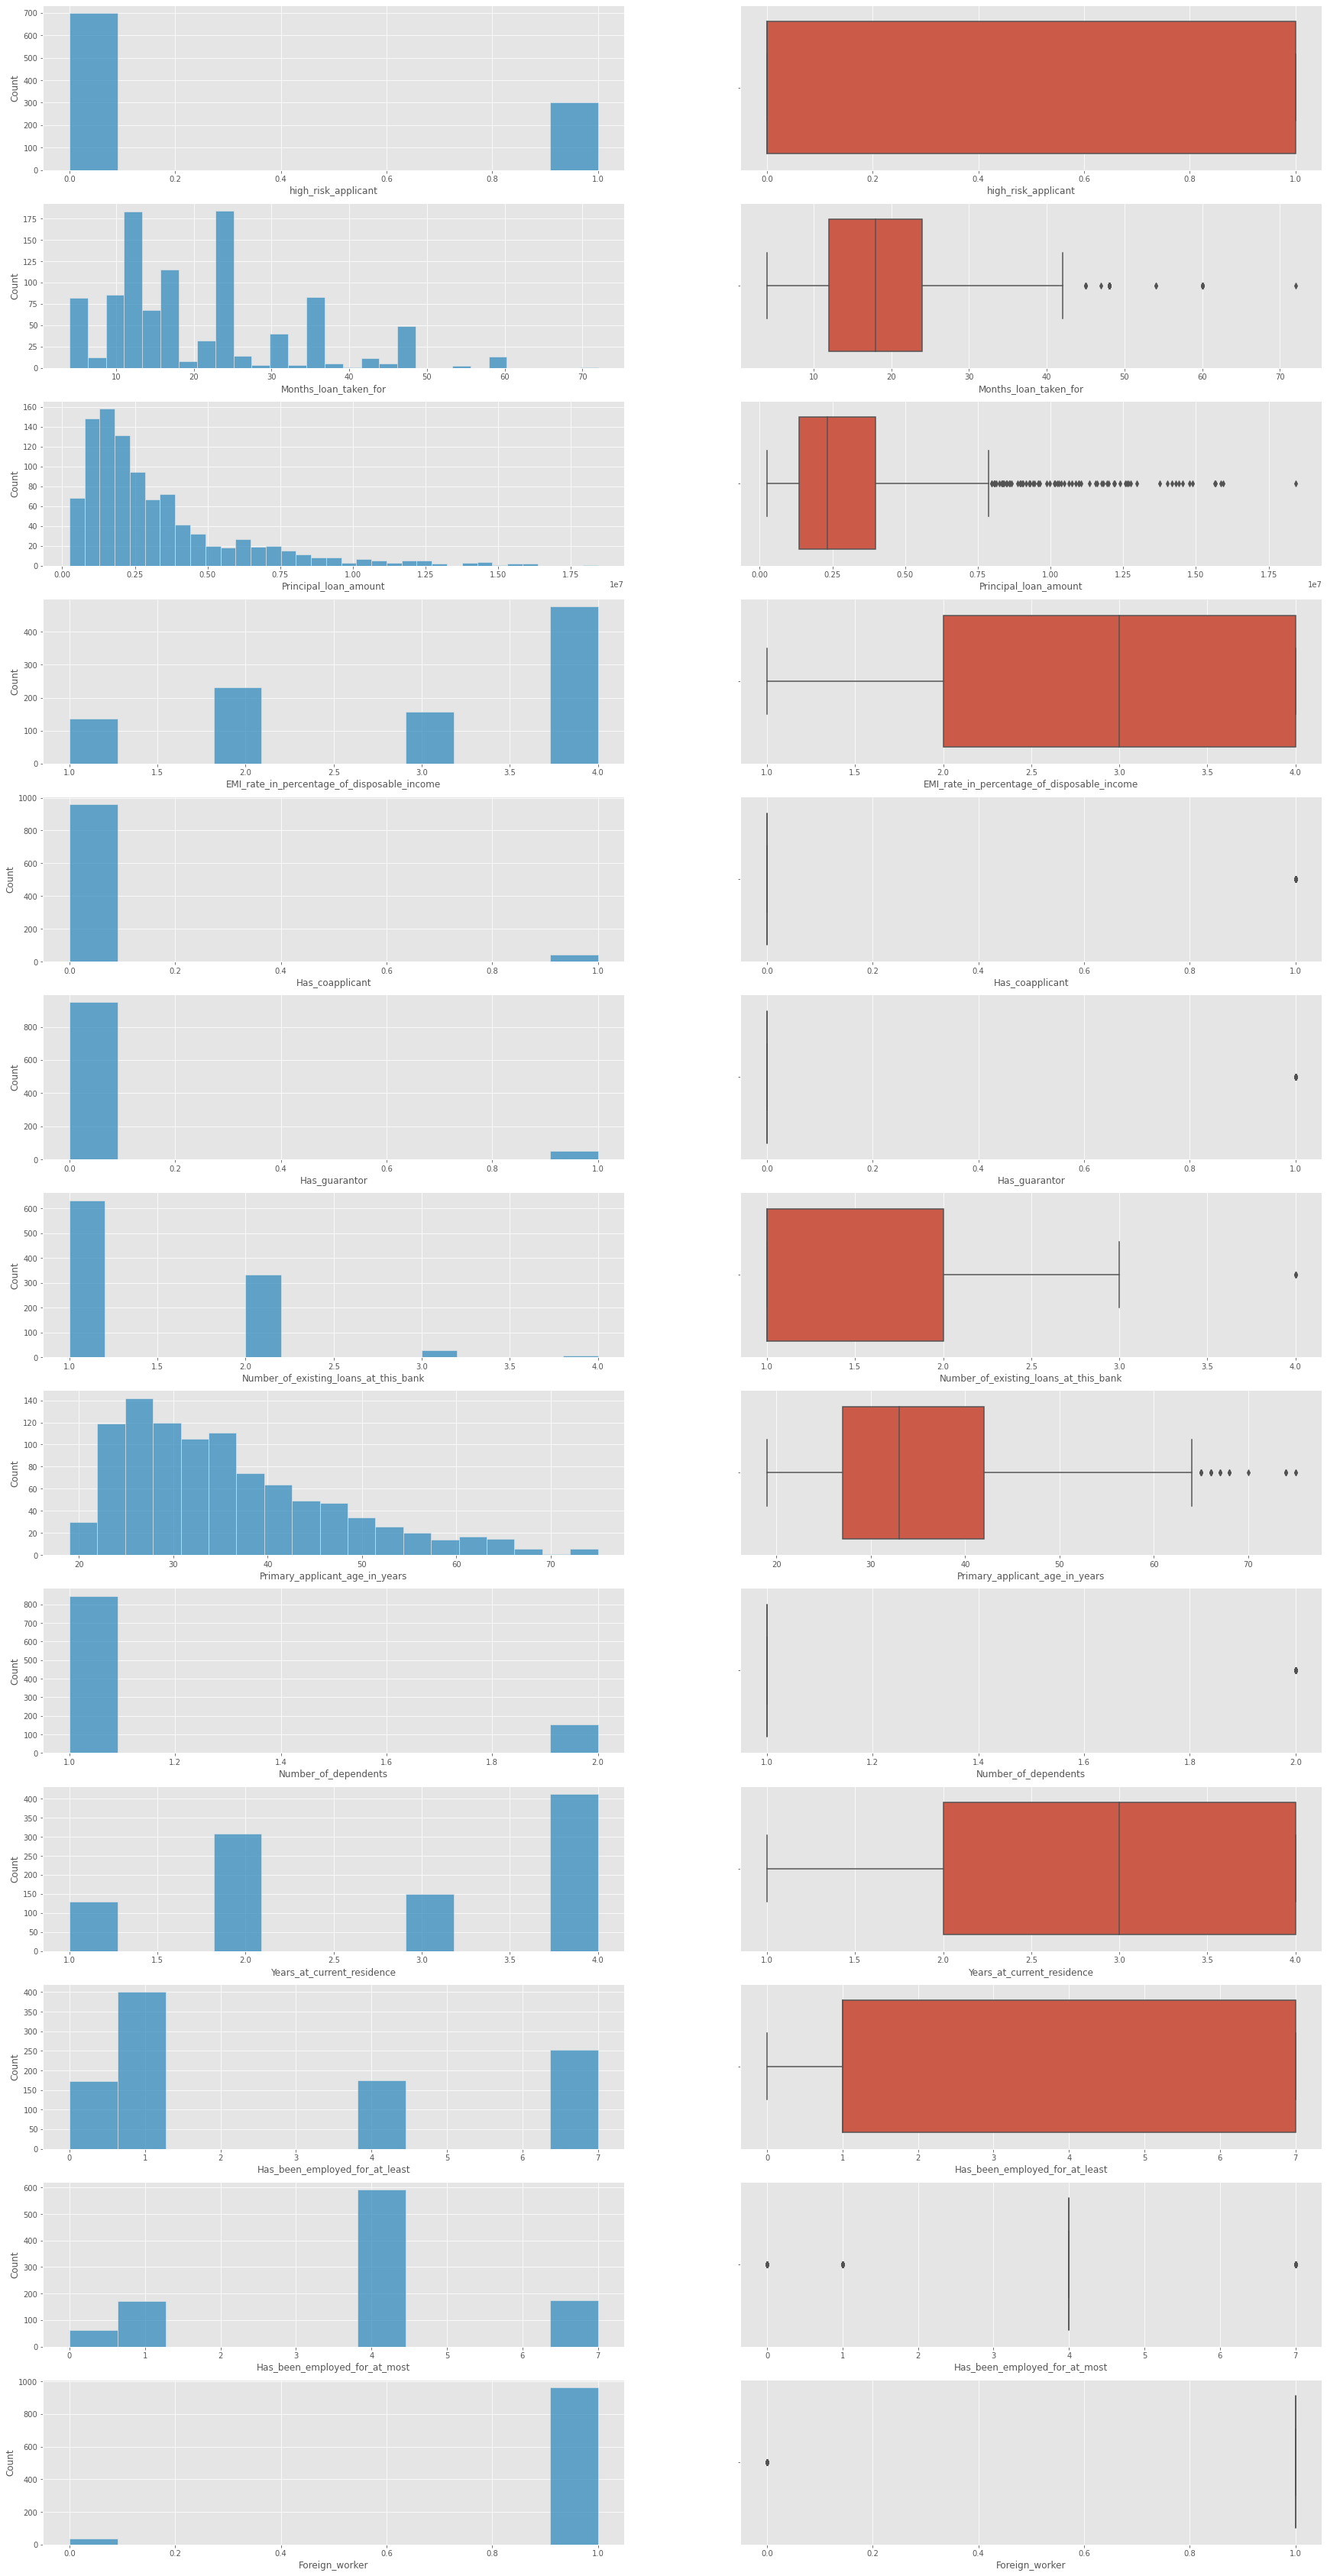

In [46]:
i = 1
plt.figure(figsize = (30,85))
for feature in continuous_features:
    plt.subplot(18,2,i)
    sns.histplot(data=df, x=df[feature])
    i +=1

    plt.subplot(18,2,i)
    sns.boxplot(data=df, x=df[feature])
    i +=1

### Before skewness-  no need of treating outliers as discussed in data insights folder

In [47]:
# def outliers_percentage(df,continuous_features):
#     No_outliers_col = []
#     delete_col = []
#     for col_name in continuous_features:
#         skew_val = df[[col_name]].skew().values[0] 
#         print("checking the skewness before transformation\033[1;34;5;124m",col_name,"\033[0m: \033[1m%.2f"%skew_val,"\033[0m")
#         if skew_val > 1 :
#             df[col_name]= np.log10(df[col_name])
#             No_outliers_col.append(col_name)
#         elif skew_val > 0.5 :
#             df[col_name]= np.sqrt(df[col_name])
#             No_outliers_col.append(col_name)
#     print('\n')
#     for col_name in No_outliers_col:
#         skew_val = df[[col_name]].skew().values[0] 
#         print("checking the skewness after transformation\033[1;34;5;124m",col_name,"\033[0m: \033[1m%.2f"%skew_val,"\033[0m")
    
#     return No_outliers_col

# No_outliers_col = outliers_percentage(df,continuous_features)
# print(No_outliers_col)

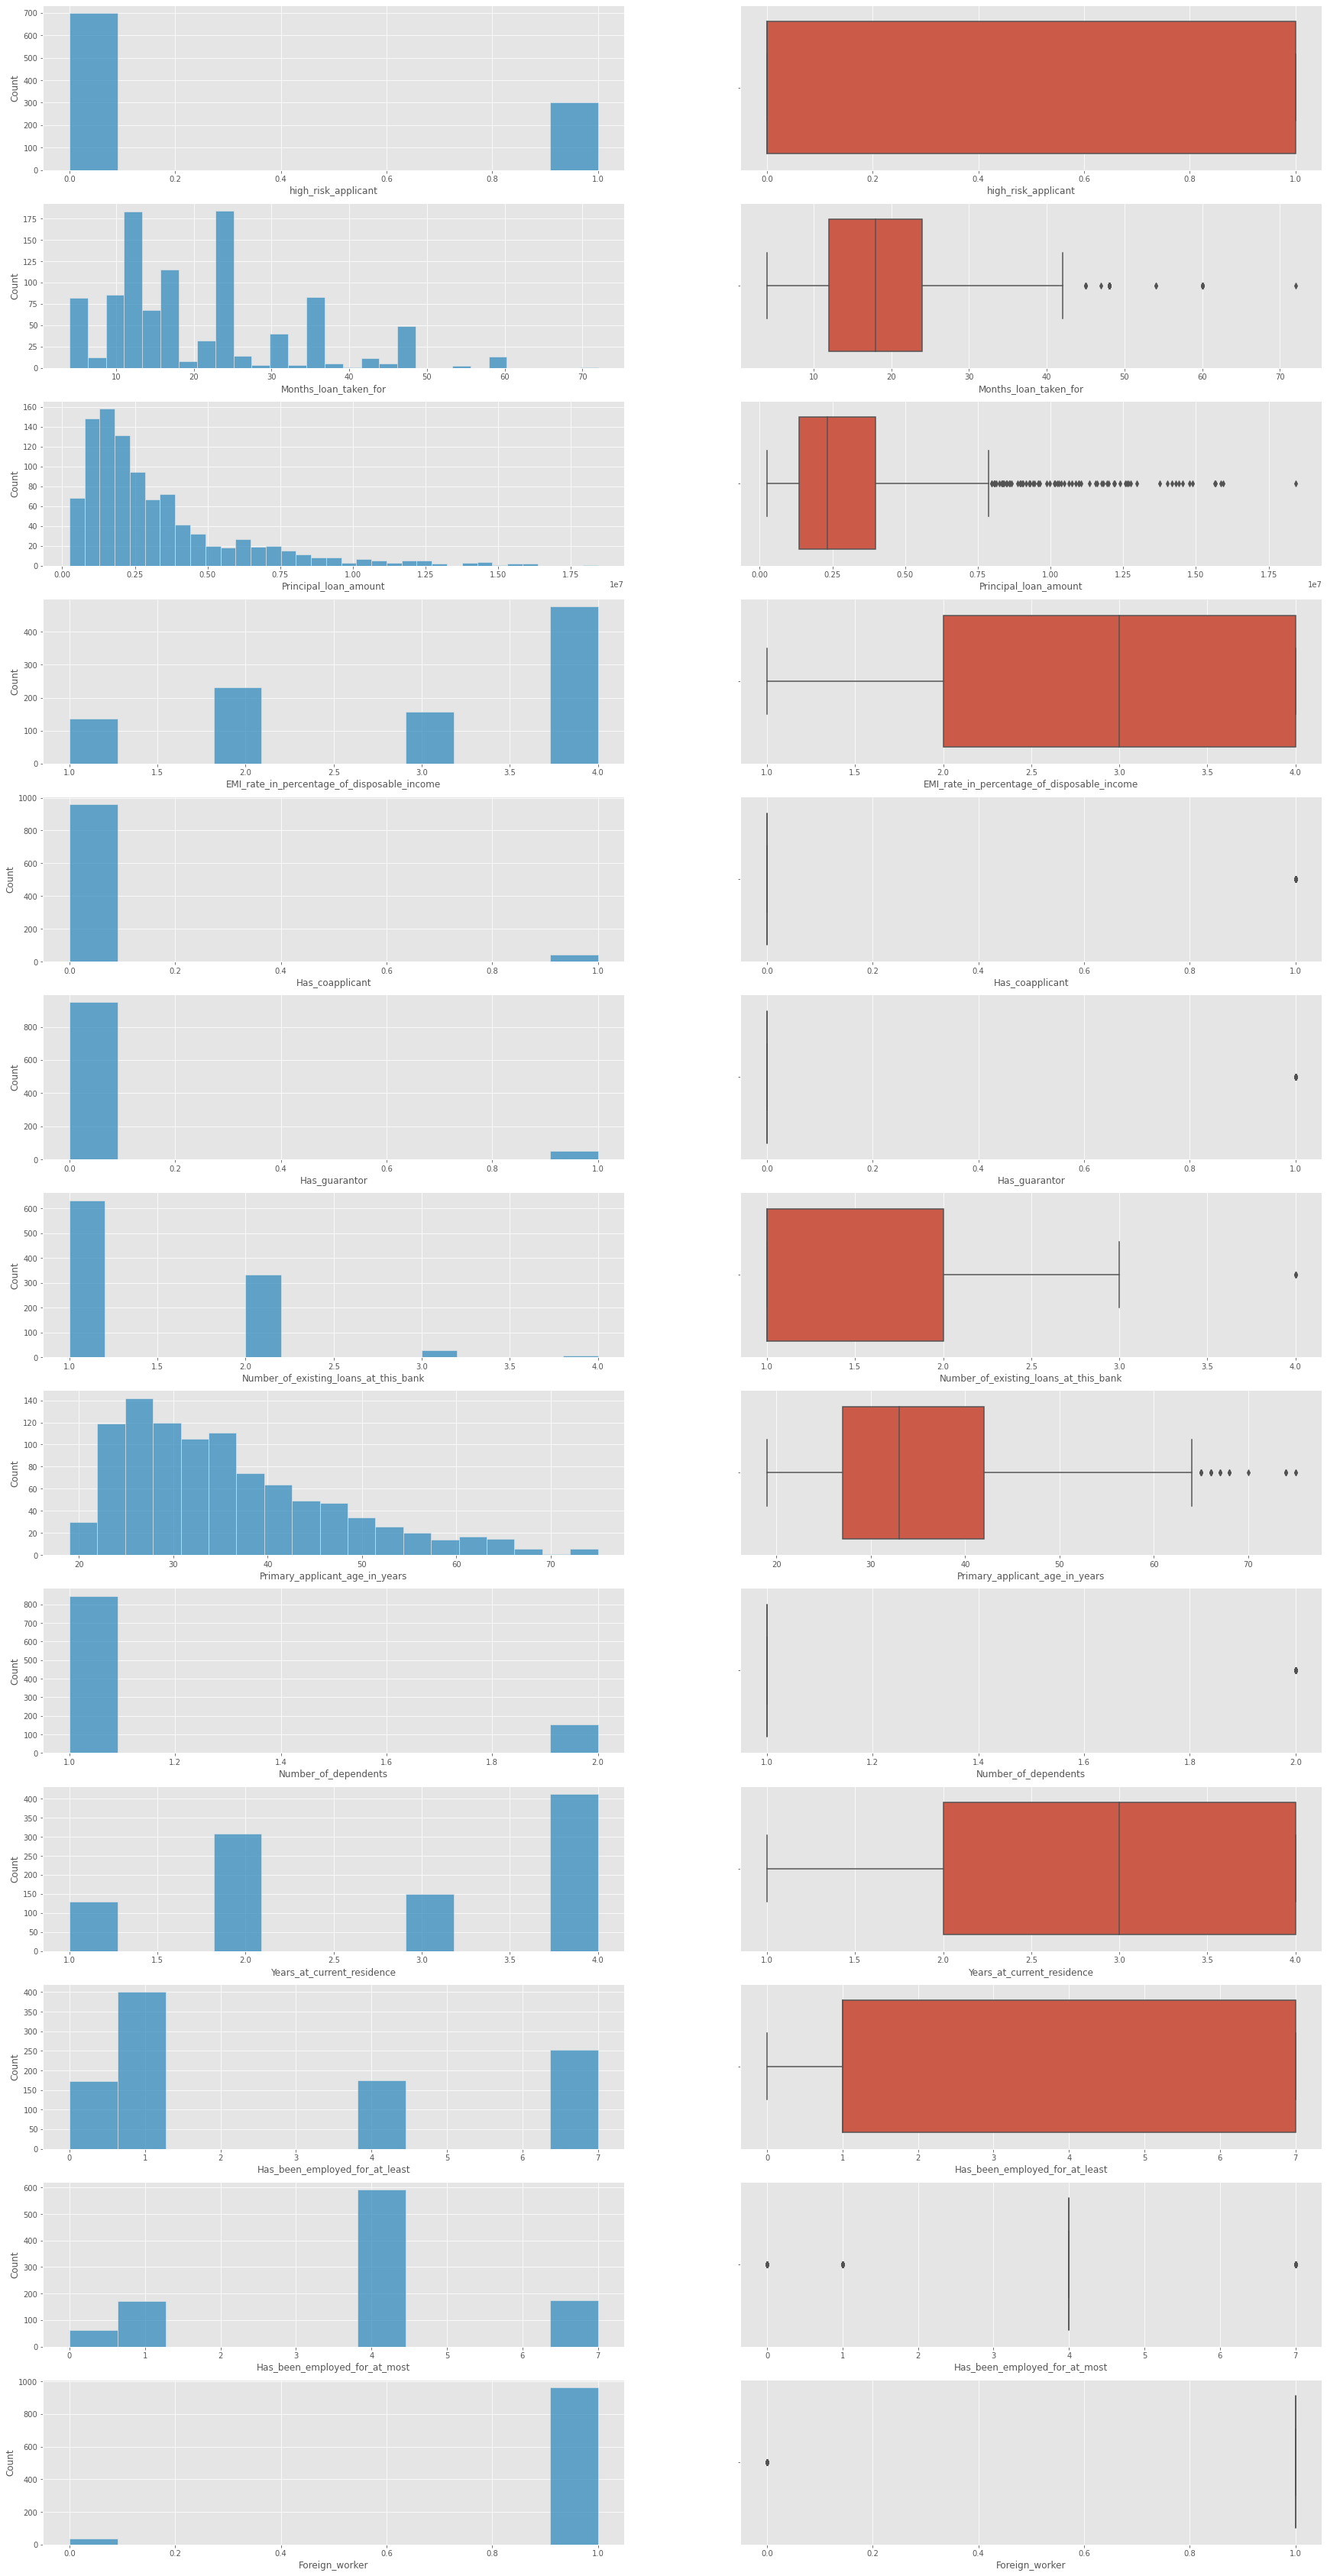

In [48]:
i = 1
plt.figure(figsize = (30,85))
for feature in continuous_features:
    plt.subplot(18,2,i)
    sns.histplot(data=df, x=df[feature])
    i +=1

    plt.subplot(18,2,i)
    sns.boxplot(data=df, x=df[feature])
    i +=1

### Exploratory Data Analysis

By performing EDA, we can uncover the underlying structure of data and test our hypotheses with the help of summary statistics. We can split EDA into three parts:

- Univariate analysis
- Bivariate analysis
- Correlation

In [49]:
import warnings
warnings.filterwarnings("ignore")
# Imported Libraries
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df['Marital_status'].value_counts()

single                        548
divorced/separated/married    310
married/widowed                92
divorced/separated             50
Name: Marital_status, dtype: int64

#### - We can infer that our dataset has a high number of people who are single (unmarried), closely followed by people who are divorced/separated/married.

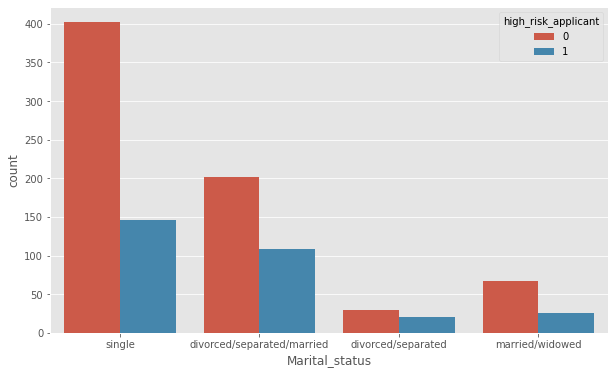

In [52]:
sns.countplot(x='Marital_status',hue='high_risk_applicant',data=df)
plt.show()

###  Most high risks/defaults come from divorced/separated people

### Housing

In [53]:
df['Housing'].value_counts()

own         713
rent        179
for free    108
Name: Housing, dtype: int64

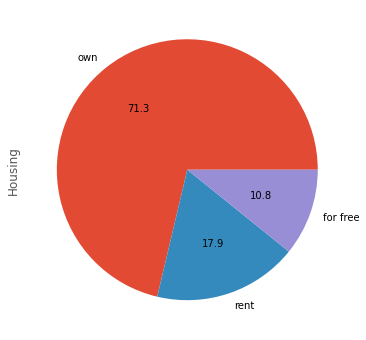

In [54]:
df['Housing'].value_counts().plot(kind= 'pie', autopct='%0.1f');

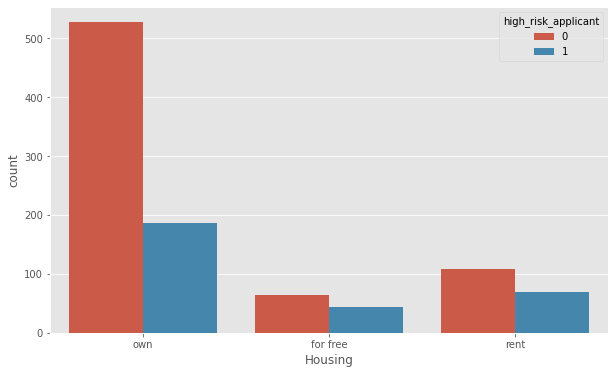

In [55]:
sns.countplot(x='Housing',hue='high_risk_applicant',data=df)
plt.show()

### People for free housing segment hav higheest risk tendancy

### The Gender column:

In [56]:
df['Gender'].value_counts()

male      690
female    310
Name: Gender, dtype: int64

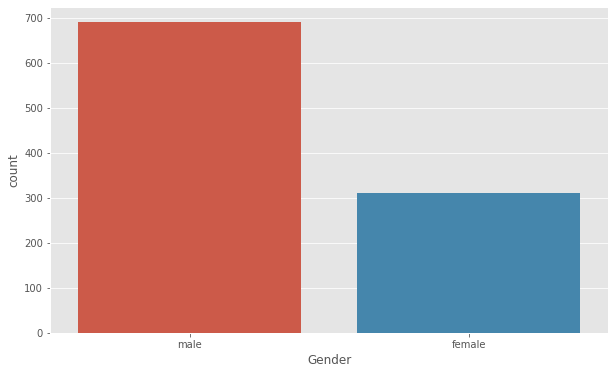

In [57]:
sns.countplot(df['Gender'])
plt.show()

### As you can see in the preceding output, there are a total of 310 females and 690 males in the given dataset.
### So males take more credit than females. Interesting to know which sex defaults more

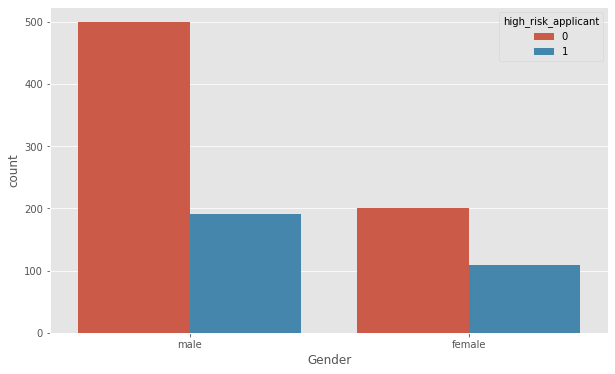

In [58]:
sns.countplot(x='Gender',hue='high_risk_applicant',data=df)
plt.show()

### Clearly females default much more, nearly 1/3rd defaults. 
### While males probability of defaulting is roughly 2/7

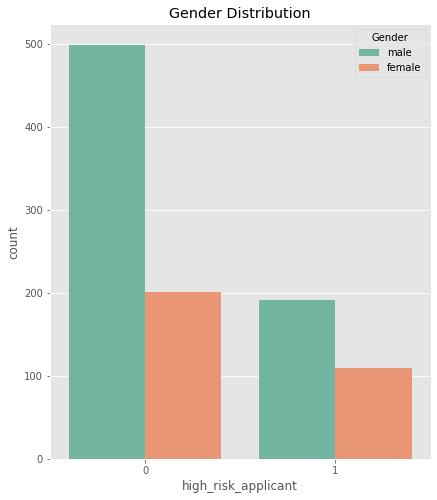

In [59]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='high_risk_applicant',hue='Gender',data=df, palette = 'Set2')
plt.title("Gender Distribution");

### Purpose column

In [60]:
df['Purpose'].value_counts()

electronic equipment    292
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

### -Most people take laon for electroic equipments followed by loan for new vehicle

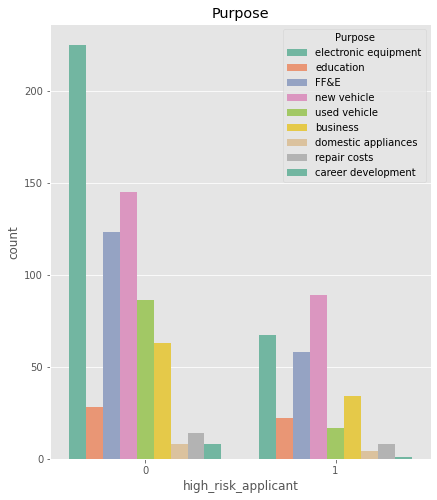

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='high_risk_applicant',hue='Purpose',data=df, palette = 'Set2')
plt.title("Purpose");

### Employee status

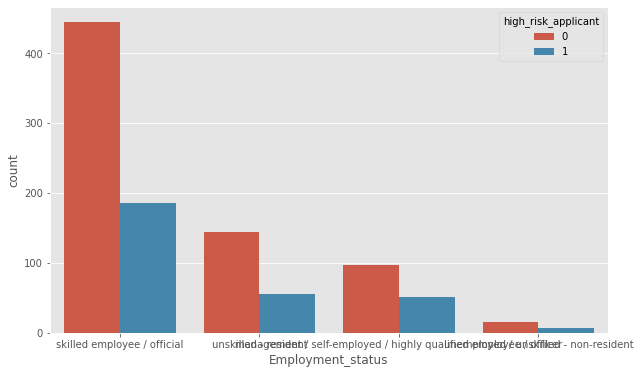

In [62]:
sns.countplot(x='Employment_status',hue='high_risk_applicant',data=df)
plt.show()

### WE see skilled employees take max loan but no clear default type can be seen as roughly half of people in every category are high rsik 

### 'Has_guarantor'

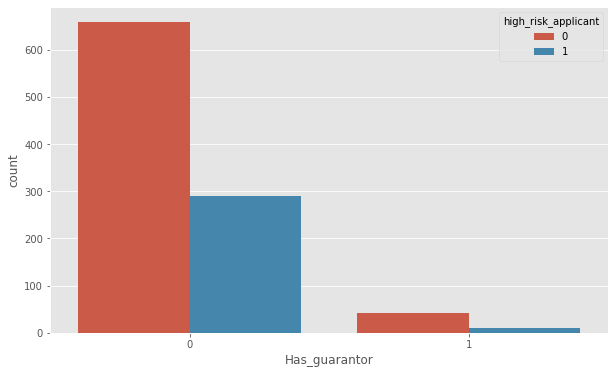

In [63]:
sns.countplot(x='Has_guarantor',hue='high_risk_applicant',data=df)
plt.show()

### People having no guaranter are at higher risk to default roughly 1/3rd of the times 

### Number_of existing loans_at bank

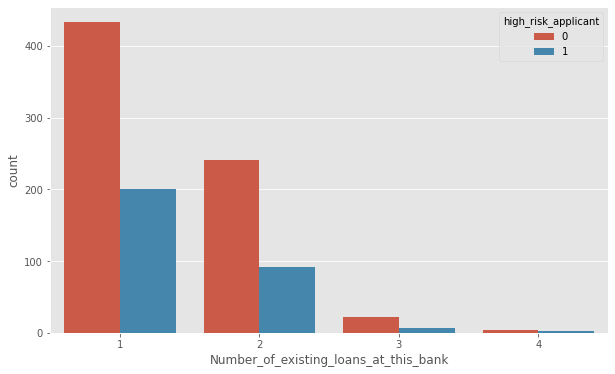

In [64]:
sns.countplot(x='Number_of_existing_loans_at_this_bank',hue='high_risk_applicant',data=df)
plt.show()

### EMI_rate_in_percentage_of_disposable_income

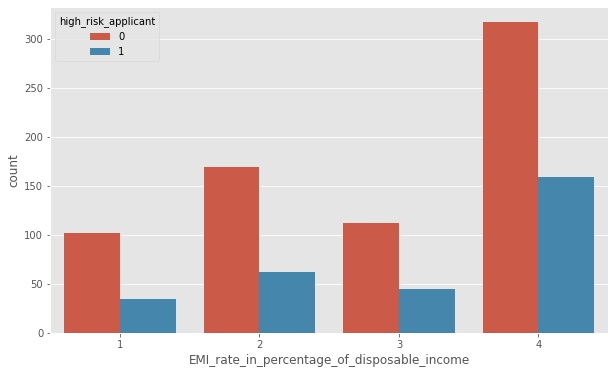

In [65]:
sns.countplot(x='EMI_rate_in_percentage_of_disposable_income',hue='high_risk_applicant',data=df)
plt.show()

### For 4% EMI, people are getting most loans, and thats when their defaulter risk is highest


### Visualize the distribution of the age

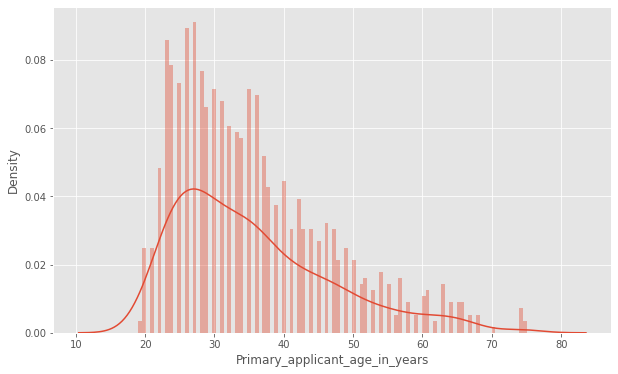

In [66]:
sns.distplot(df['Primary_applicant_age_in_years'],bins=100)
plt.show()

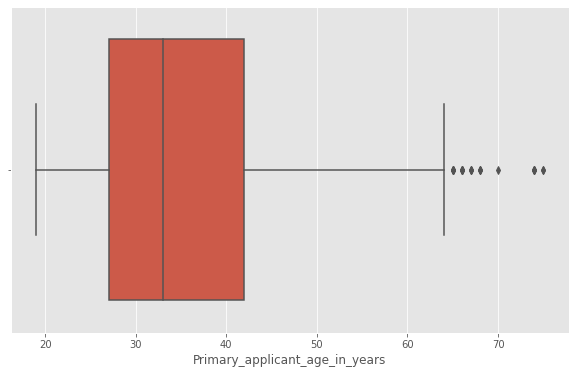

In [67]:
sns.boxplot(df['Primary_applicant_age_in_years'])

### Mean people's age lies at 34 years. MAximum applicants age is quite young ranging from 26 to 42 years. There are a few outliers for elderly peoplke

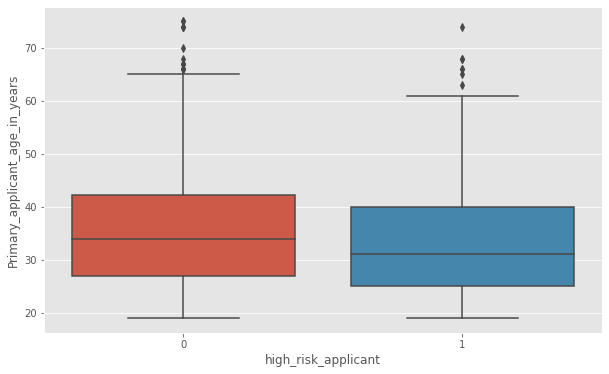

In [68]:
sns.boxplot(x=df['high_risk_applicant'], y=df['Primary_applicant_age_in_years'])

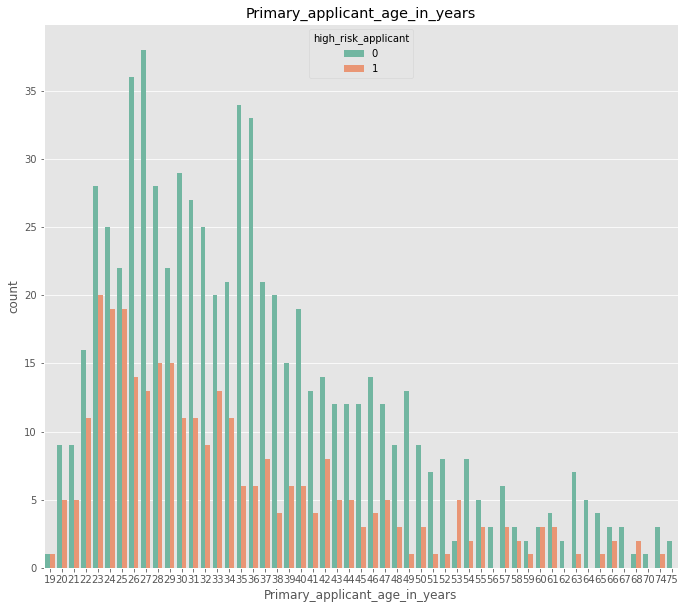

In [69]:
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.countplot(x='Primary_applicant_age_in_years',hue= 'high_risk_applicant',data=df, palette = 'Set2')
plt.title("Primary_applicant_age_in_years");

### PEople at high risk also lie in the young age group of 25-40. So highly correlated features are obtained

In [70]:
from scipy import stats
binary_data = df.groupby('high_risk_applicant')
age_0 = binary_data['Primary_applicant_age_in_years'].get_group(0)
age_1 = binary_data['Primary_applicant_age_in_years'].get_group(1)

stats.ttest_ind(age_0, age_1)

Ttest_indResult(statistic=2.890846677564194, pvalue=0.003925339398276282)

The p-value confirms the null hypothesis and rejects the alternative hypothesis meaning that the feature will be kept.

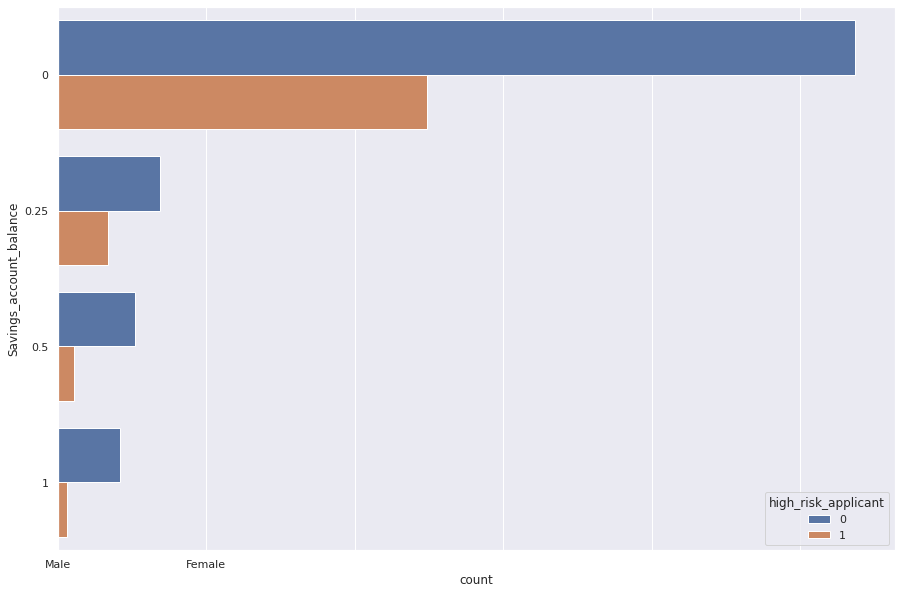

In [71]:
sns.set(rc={'figure.figsize':(15,10)})

edu = sns.countplot(y='Savings_account_balance', hue='high_risk_applicant', data=df)

edu.set_xticklabels(['Male','Female'])

plt.show()

### We clearly see Default Risk increases considerably when Savings_account_balance is low so it is an alarm. also in medium risk,around half of the people come out to be defaulters

In [72]:
pd.crosstab(df.Primary_applicant_age_in_years,df.high_risk_applicant,normalize='index',margins=True)

high_risk_applicant,0,1
Primary_applicant_age_in_years,,
19,0.500000,0.500000
20,0.642857,0.357143
21,0.642857,0.357143
22,0.592593,0.407407
23,0.583333,0.416667
24,0.568182,0.431818
25,0.536585,0.463415
26,0.720000,0.280000
27,0.745098,0.254902


In [73]:
pd.crosstab(df.Has_guarantor,df.high_risk_applicant,normalize='index',margins=True)

high_risk_applicant,0,1
Has_guarantor,,
0,0.694093,0.305907
1,0.807692,0.192308
All,0.700000,0.300000


In [74]:
pd.crosstab(df.EMI_rate_in_percentage_of_disposable_income,df.high_risk_applicant,normalize='index',margins=True)

high_risk_applicant,0,1
EMI_rate_in_percentage_of_disposable_income,,
1,0.750000,0.250000
2,0.731602,0.268398
3,0.713376,0.286624
4,0.665966,0.334034
All,0.700000,0.300000


In [75]:
pd.crosstab(df.Marital_status,df.high_risk_applicant,normalize='index',margins=True)

high_risk_applicant,0,1
Marital_status,,
divorced/separated,0.600000,0.400000
divorced/separated/married,0.648387,0.351613
married/widowed,0.728261,0.271739
single,0.733577,0.266423
All,0.700000,0.300000


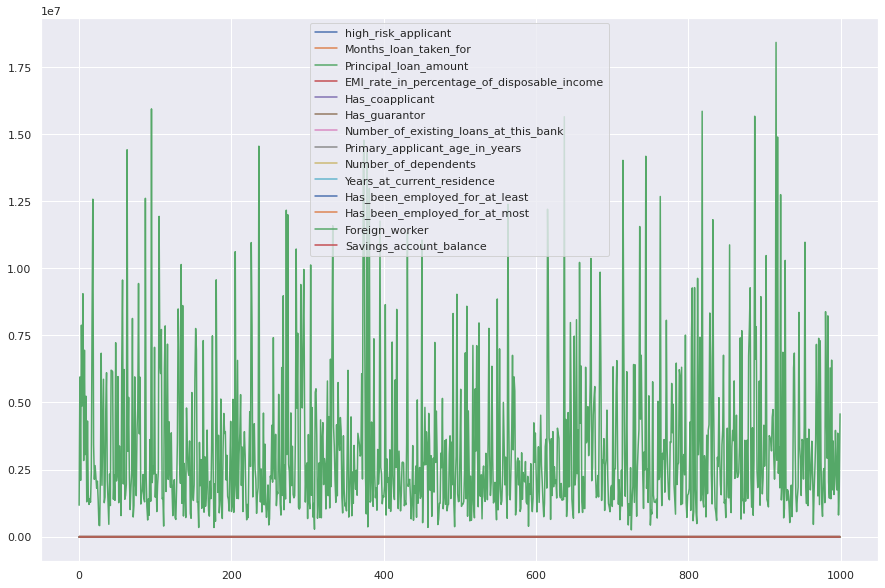

In [76]:
df.plot()

### Correlation Analysis :

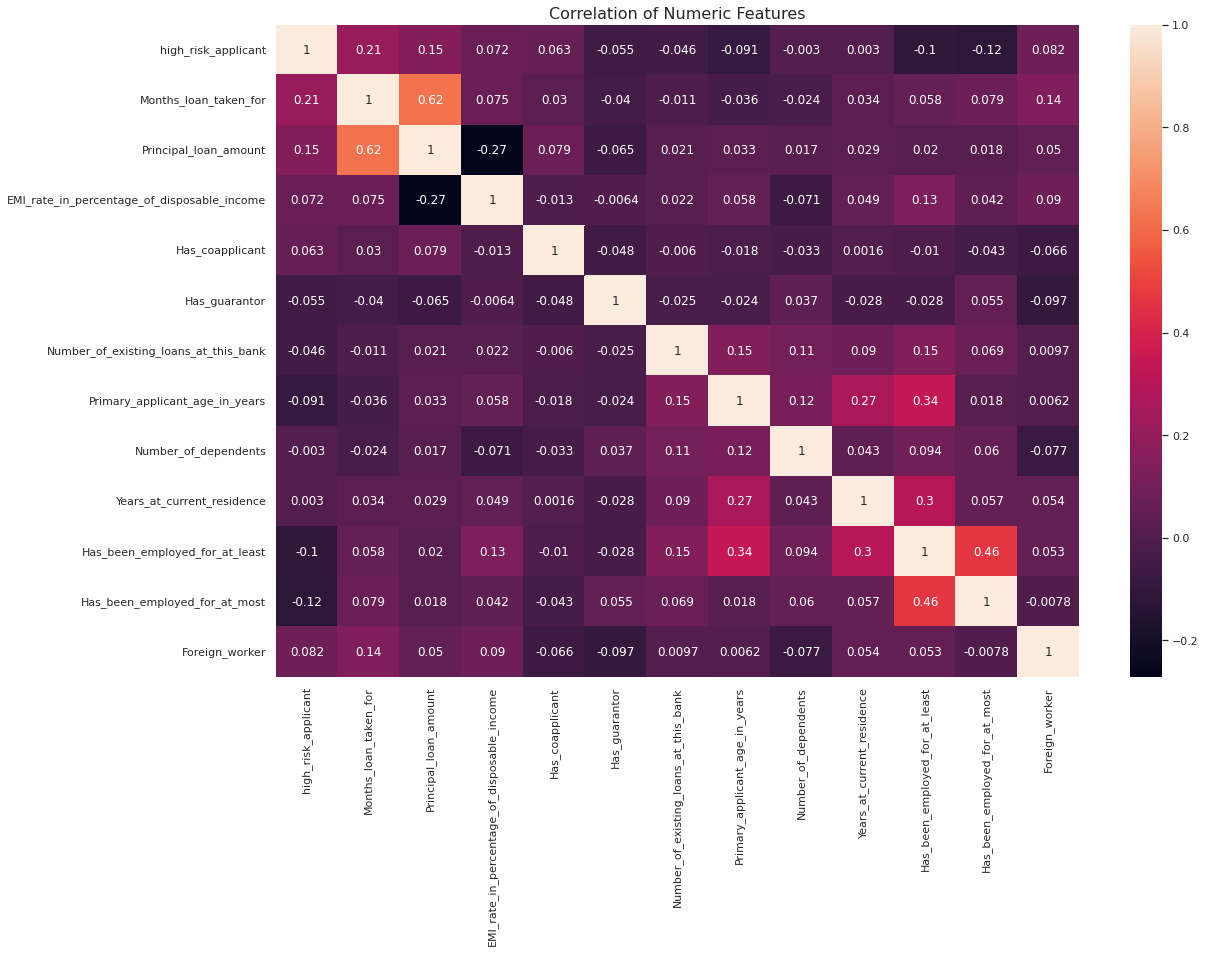

In [77]:
plt.figure(figsize=(18, 12))
plt.title('Correlation of Numeric Features',y=1,size=16)
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Correlation of all continous features except Principal Loan amount with respect to the target column is found to be very low.
### - Checking the distribution of the target column 'high_risk_applicant'

In [78]:
df.groupby(['high_risk_applicant']).count()

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
high_risk_applicant,,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300


- high_risk_applicant is our Target column.

- Note: Notice how imbalanced is our original dataset! There are 700 cases of low risk applicants and 300 cases of high risk applicants. In this dataset, the classes are skewed.

- We can say that the model we gonna build will perform well in indentifying low risk applicants than in indentifying high risk applicants.If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are low risk. But we don't want our model to assume, we want our model to detect patterns that give signs of high risk!


However, In real world, if the ratio is skewed as well then its a call we have to take on what's the objective of model.
- Since generally for a bank, it is more important to correctly classify high risk applicants than misclassify low risk applicants, we will have to do something about it.

#### - In this case the classifier will always predicts the most common class without performing any analysis of the features and it will have a high accuracy rate, where the accuray is not good metric in such cases.
#### - In such cases we need to go for handling the imbalance dataset using oversampling or downsampling approaches. (In TASK 2)

Text(0.5, 1.0, 'Class Distributions \n (0: low risk || 1: high risk)')

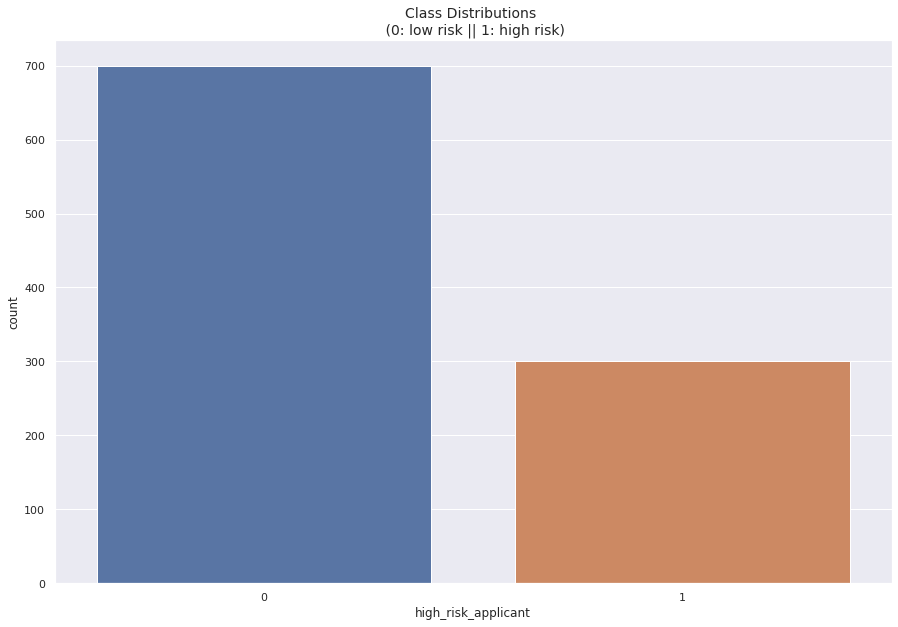

In [79]:
sns.countplot('high_risk_applicant', data=df)
plt.title('Class Distributions \n (0: low risk || 1: high risk)', fontsize=14)

## Skewness and Kurtosis

### Skewness

- In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or even undefined.

### Kurtosis

- Kurtosis is a measure of whether the data are peaked or flat relative to a normal distribution.That is, data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails.

In [80]:
df.skew(axis=0,skipna=True)

high_risk_applicant                            0.874183
Months_loan_taken_for                          1.094184
Principal_loan_amount                          1.949628
EMI_rate_in_percentage_of_disposable_income   -0.531348
Has_coapplicant                                4.636536
Has_guarantor                                  4.041610
Number_of_existing_loans_at_this_bank          1.272576
Primary_applicant_age_in_years                 1.020739
Number_of_dependents                           1.909445
Years_at_current_residence                    -0.272570
Has_been_employed_for_at_least                 0.573675
Has_been_employed_for_at_most                 -0.118245
Foreign_worker                                -4.913027
Savings_account_balance                        2.624088
dtype: float64

### Exporting clean dataset after basic changed done in EDA to be used in Task 2

In [81]:
df.to_csv(r"E:\Reunion ML Test\comb.csv",index=False)
df

,high_risk_applicant,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Foreign_worker,Savings_account_balance
0,0,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,67,male,single,1,own,4,skilled employee / official,7.0,4.0,1,0
1,1,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,22,female,divorced/separated/married,1,own,2,skilled employee / official,1.0,4.0,1,0
2,0,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,49,male,single,2,own,3,unskilled - resident,4.0,7.0,1,0
3,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,45,male,single,2,for free,4,skilled employee / official,4.0,7.0,1,0
4,1,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,53,male,single,2,for free,4,skilled employee / official,1.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,31,female,divorced/separated/married,1,own,4,unskilled - resident,4.0,7.0,1,0
996,0,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1.0,4.0,1,0
997,0,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,38,male,single,1,own,4,skilled employee / official,7.0,4.0,1,0
998,1,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,23,male,single,1,for free,4,skilled employee / official,1.0,4.0,1,0


# END-Task1

In [82]:
#df['high_risk_applicant'] = df['high_risk_applicant'].astype('O')

In [83]:
#df.info()

In [84]:
#df.isnull().sum()

In [85]:
# Changing object datatype to categorical so as to do mathematical computations
# df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Lets start by doing upsampling or downsampling and choosing which gives better results.

In [86]:
# df=df.astype(float)

In [87]:
# array = df.values
# X = array[:,1:24] # select all rows and first 8 columns which are the attributes
# Y = array[:,0]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
# test_size = 0.30 # taking 70:30 training and test set
# seed = 7  # Random numbmer seeding for reapeatability of the code
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# type(X_train)

### Using SMOTE to to oversample minority data of High risk



In [88]:
# from imblearn.over_sampling import SMOTE
# print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


# print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



# print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

In [89]:

# sm = SMOTE(sampling_strategy='minority', random_state=42)

# # Fitting model to generate data
# X_res, y_res = sm.fit_resample(X,y)
# df_res = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

In [90]:
# Create a separate dataframe consisting only of the features i.e independent attributes

# dfcopy = df.drop(labels= "high_risk_applicant" , axis = 1)
# dfcopy.head()

#### dfcopy contains only independent variables.

In [91]:
# from scipy.stats import zscore
# # convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# # It is always adviced to scale numeric attributes in models that calculate distances.
# df_z=dfcopy.apply(zscore) # converts all attributes to Z-Score
# df_z.describe()


#### df_z denotes Normalised data features

When data available is large, always splitting data first into Training, Validation, Testing is the preferred method.

Apply Data standardiasation techniques such as Z-Score on each dataset separately/independently

Applying standardisation first and splitting the data later can lead to data leak resulting in more than realistic accuracy scores in testing.

In [92]:
# %matplotlib inline
# import matplotlib.pyplot as plt

# #defaults
# plt.rcParams['figure.figsize'] = (20.0, 20.0)
# plt.rcParams.update({'font.size': 10})
# plt.rcParams['xtick.major.pad']='5'
# plt.rcParams['ytick.major.pad']='5'

# plt.style.use('ggplot')

In [93]:
# from sklearn.preprocessing import LabelEncoder
# def Encoder(df):
#           columnsToEncode = list(df.select_dtypes(include=['category','object']))
#           le = LabelEncoder()
#           for feature in columnsToEncode:
#               try:
#                   df[feature] = le.fit_transform(df[feature])
#               except:
#                   print('Error encoding '+feature)
#           return df
# df = Encoder(df)
# df.info()